In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize  # 最佳化成本函數
from sklearn import preprocessing  # feature mapping（將原有的特徵複雜化）
%matplotlib inline

## Define General Function

In [2]:
def loadData(file, column_name):
    data = pd.read_csv(file, header=None, names=column_name)
    print (data.shape)
    return (data)

In [37]:
def plotData(data, x1_label, x2_label, pos_legend, neg_legend):
    x_pos = data.loc[data['Label']==1, data.columns[0]]
    y_pos = data.loc[data['Label']==1, data.columns[1]]
    x_neg = data.loc[data['Label']==0, data.columns[0]]
    y_neg = data.loc[data['Label']==0, data.columns[1]]
    plt.scatter(x_pos, y_pos, marker='o', color='blue', label=pos_legend)
    plt.scatter(x_neg, y_neg, marker='x', color='red', label=neg_legend)
    plt.xlabel(x1_label)
    plt.ylabel(x2_label)
    plt.legend()

## Logistic Regression

### Read in Data

In [4]:
data = loadData('ex2/ex2data1.txt', column_name=['Exam 1 score', 'Exam 2 score', 'Label'])
data.head(10)

(100, 3)


,Exam 1 score,Exam 2 score,Label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


### Plot Data

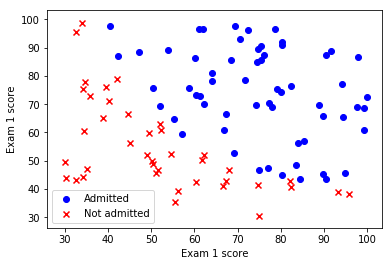

In [5]:
plt.figure(figsize=(8,5))
plotData(data, x1_label='Exam 1 score', x2_label='Exam 1 score', pos_legend='Admitted', neg_legend='Not admitted')

### Logistic Hypothesis

In [6]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return (g)

def h(theta, X):
    hypothesis = sigmoid(np.dot(X, theta))
    return (hypothesis)

### Cost Function & Optimize Theta

#### Dataset

In [7]:
# dimension of feature data
m, n = data.iloc[:, 0:2].shape

# feature matrix X and response vector y
X0 = pd.DataFrame(np.ones([m, 1]))  # X0=1 is added
X = pd.concat([X0, data.iloc[:, 0:2]], axis=1)
y = data.Label.values.reshape(m, 1)

#### Cost Function

In [8]:
def computeCost(theta, X, y):
    J = (-1/m) * ((np.dot(y.T, np.log(h(theta, X)))) + np.dot((1-y).T, np.log(1-h(theta, X))))
    return (J)

In [9]:
theta_init = np.zeros([n+1, 1])  # theta is a vector with n+1 rows and 1 columns(if X has n features, X0=1 is added)
print('initial cost : %f'%(computeCost(theta_init, X, y)))

initial cost : 0.693147


#### Gradient

In [10]:
def gradient(theta, X, y):
    m = y.size
    grad = (1/m) * np.dot(X.T, (h(theta, X) - y))
    return (grad)

In [11]:
gradient(theta_init, X, y)

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

#### Optimize Theta

In [12]:
def optimizeTheta(theta, X, y):
    result = optimize.fmin(computeCost, x0=theta, args=(X, y), maxiter=400, full_output=True)
    return (result[0].reshape(-1,1))

In [13]:
optTheta = optimizeTheta(theta_init, X, y)
optTheta

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


array([[-25.16130062],
       [  0.20623142],
       [  0.20147143]])

### Predict and Accuracy

#### Predict

In [14]:
def predict(theta, X, threshold=0.5):
    X.insert(0, 1)
    X = np.array(X).reshape(-1, n+1)
    probability = h(theta, X)
    if probability >= threshold:
        print('Admitted')
        print('Probability : %.2f'%(probability))
    else:
        print('Not admitted')
        print('Probability : %.2f'%(probability))
    return

In [15]:
predict(optTheta, [45, 85])

Admitted
Probability : 0.78


#### Accuracy

In [16]:
def accuracy(theta, X, threshold=0.5):
    probability = h(theta, X) >= threshold
    classify = probability.astype('int')
    accuracy = np.sum((classify == y) / classify.size)
    print('Accuracy : %.2f'%(accuracy))
    return

In [17]:
accuracy(optTheta, X)

Accuracy : 0.89


### Decision Boundary

In [18]:
x1_min, x1_max = min(X.iloc[:, 1]), max(X.iloc[:, 1])
x2_min, x2_max = min(X.iloc[:, 2]), max(X.iloc[:, 2])
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
xx = np.array([np.ones(xx1.ravel().shape), xx1.ravel(), xx2.ravel()]).T
hypothesis = h(optTheta, xx).reshape(xx1.shape)

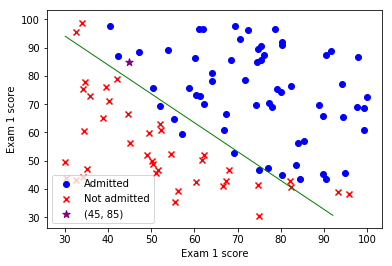

In [19]:
plt.figure(figsize=(8,5))
plotData(data, x1_label='Exam 1 score', x2_label='Exam 1 score', pos_legend='Admitted', neg_legend='Not admitted')
plt.scatter(45, 85, s=60, color='purple', marker='*', label='(45, 85)')
plt.contour(xx1, xx2, hypothesis, [0.5], linewidths=1, colors='green');
plt.legend()

## Regularized Logistic Regression

### Read in Data

In [20]:
data2 = loadData('ex2/ex2data2.txt', column_name=['Microchip Test 1', 'Microchip Test 2', 'Label'])
data2.head(10)

(118, 3)


,Microchip Test 1,Microchip Test 2,Label
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


### Plot Data

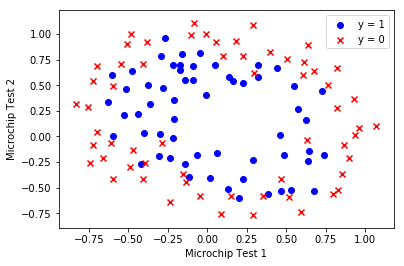

In [21]:
plt.figure(figsize=(6,6))
plotData(data2, x1_label='Microchip Test 1', x2_label='Microchip Test 2', pos_legend='y = 1', neg_legend='y = 0')

### Feature Mapping

In [22]:
# This function inserts a column with 'ones' in the design matrix for the intercept, we don't need to add x0=1.
# e.g., if input = [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]
poly = preprocessing.PolynomialFeatures(degree=6, include_bias=True)
X2 = poly.fit_transform(data2.iloc[:, 0:2])

# Now feature matrix is 28-dimensional matrix (2-dimensional originally)
X2.shape

(118, 28)

### Cost Function & Optimize Theta with Regularization

#### Cost Function with Regularization (assume lambda = 1)

In [23]:
m2, n2 = X2.shape
y2 = data2.Label.values.reshape(-1, 1) # reshape(m2, 1)

In [24]:
def computeCostReg(theta, X, y, lambdaConstant):
    reg_term = (lambdaConstant/2/m2) * np.sum(theta[1:]**2)  # theta正規化，theta_0 is neglected
    J = (-1/m2)* (np.dot(y.T, np.log(h(theta, X))) + np.dot((1-y).T, np.log(1-h(theta, X)))) + reg_term
    return (J)

In [25]:
thetaReg_init = np.zeros([n2, 1])
print('initial cost with regularization : %f'%(computeCostReg(thetaReg_init, X2, y2, lambdaConstant=1)))

initial cost with regularization : 0.693147


#### Optimize Theta with Regularization (assume lambda = 1)

In [26]:
# Since fmin couldn't converge, use minimum instead
# Use Conjucate Gradient algorithms to find optimization theta

def optimizeThetaReg(theta, X, y, lambdaConstant):
    result = optimize.minimize(computeCostReg, x0=theta, args=(X, y.ravel(), lambdaConstant),  method='CG', 
                      options={"maxiter":500, "disp":False} )
    return (result.x.reshape(-1,1))

In [27]:
optThetaReg = optimizeThetaReg(thetaReg_init, X2, y2, lambdaConstant=1)
optThetaReg

array([[ 1.27266761],
       [ 0.62526228],
       [ 1.18107055],
       [-2.01966508],
       [-0.91738767],
       [-1.43138792],
       [ 0.12403858],
       [-0.36548582],
       [-0.35730801],
       [-0.17502918],
       [-1.45821571],
       [-0.05116374],
       [-0.61566511],
       [-0.27472224],
       [-1.19279617],
       [-0.24223996],
       [-0.20599199],
       [-0.04486624],
       [-0.27778444],
       [-0.29540446],
       [-0.45645472],
       [-1.04337381],
       [ 0.02765882],
       [-0.29249151],
       [ 0.01547217],
       [-0.32742904],
       [-0.14392638],
       [-0.92483604]])

### Accuracy

In [28]:
def accuracyReg(theta, X, threshold=0.5):
    probability = h(theta, X) >= threshold
    classify = probability.astype('int')
    accuracy = np.sum((classify == y2) / classify.size)
    return(accuracy)

In [29]:
accuracyReg(optThetaReg, X2)

0.83050847457627119

### Decision Boundary

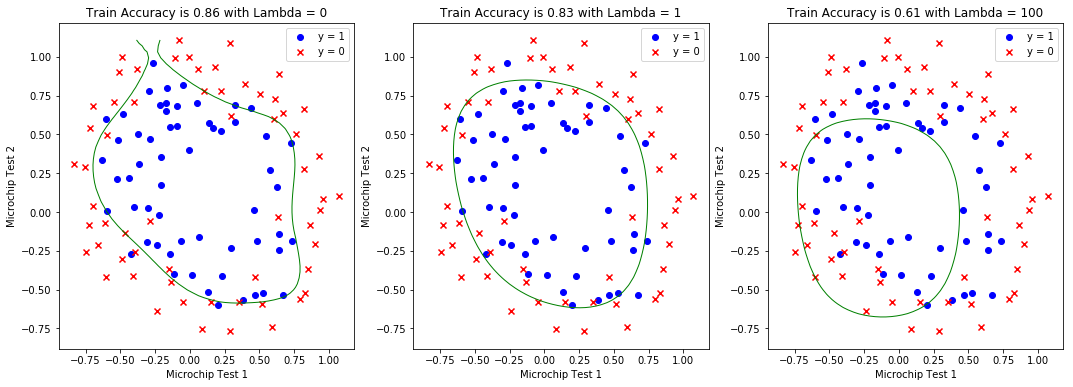

In [39]:
x1Reg_min, x1Reg_max = min(data2.iloc[:, 0]), max(data2.iloc[:, 0])
x2Reg_min, x2Reg_max = min(data2.iloc[:, 1]), max(data2.iloc[:, 1])
xx1Reg, xx2Reg = np.meshgrid(np.linspace(x1Reg_min, x1Reg_max), np.linspace(x2Reg_min, x2Reg_max))
xxReg = np.array([xx1Reg.ravel(), xx2Reg.ravel()]).T  # 無需再加bias term

plt.figure(figsize=(18, 6), facecolor='w')
for i, C in enumerate([0, 1, 100]):
    optThetaReg = optimizeThetaReg(thetaReg_init, X2, y2, lambdaConstant=C)
    hypothesisReg = h(optThetaReg, poly.fit_transform(xxReg)).reshape(xx1Reg.shape)
    accuracy = accuracyReg(optThetaReg, X2)
    plt.subplot(1,3,i+1)
    plotData(data2, x1_label='Microchip Test 1', x2_label='Microchip Test 2', pos_legend='y = 1', neg_legend='y = 0')
    plt.contour(xx1Reg, xx2Reg, hypothesisReg, [0.5], linewidths=1, colors='g');       
    plt.title('Train Accuracy is %.2f with Lambda = %i'%(accuracy, C))